In [9]:
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

In [2]:
wine = pd.read_csv("~/ucare-summer2020/datasets/winequality-white.csv", sep=";")

In [3]:
X = wine.drop(columns=['quality'])
y = wine['quality']
y = y > 5
y = y.astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X.iloc[:,0].min() - 0.01, X.iloc[:, 0].max() + 0.01
    
    # Get the min and max value of feature x2
    x2min, x2max = X.iloc[:,1].min() - 0.01, X.iloc[:, 1].max() + 0.01
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.binary, alpha=0.8)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    if(colorBar==True):
        plt.colorbar()

In [6]:
def plot_boundary_clf(clf, X):
    plt.figure(figsize=(12, 6))

    decision_boundary_class_colored(clf, X)

    plt.plot(X[y==0].iloc[:,0], X[y==0].iloc[:,1], "bo", ms=3)
    plt.plot(X[y==1].iloc[:,0], X[y==1].iloc[:,1], "go", ms=3)
    
    bp = 99.9 #boundary percentile for axis scaling
    xmin0, xmax0 = np.percentile(X.iloc[:,0], 100-bp), np.percentile(X.iloc[:,0], bp)
    xmin1, xmax1 = np.percentile(X.iloc[:,1], 100-bp), np.percentile(X.iloc[:,1], bp)
    plt.axis([xmin0, xmax0, xmin1, xmax1])
    plt.annotate('Bad Wine', xy=(0.85, 0.95), xycoords='axes fraction', color="b")
    plt.annotate('Good Wine', xy=(0.85, 0.85), xycoords='axes fraction', color="g")
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.title("Decision Tree Boundary Plot", fontsize=16)
    plt.show()

In [16]:
def decision_tree_report(feature1, feature2):
    scaler = StandardScaler()
    
    eff_X = X.loc[:, [feature1, feature2]]
    eff_X_test = X_test.loc[:, [feature1, feature2]]
    eff_X_train = X_train.loc[:, [feature1, feature2]]
    
    param_grid = {'min_samples_leaf': [1, 2, 3, 4, 6, 8, 15, 30, 50, 100],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
    dt_clf = DecisionTreeClassifier()

    dt_clf_cv = GridSearchCV(dt_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
    dt_clf_cv.fit(eff_X_train, y_train)

    params_optimal = dt_clf_cv.best_params_

    print("Optimal Hyperparameter Values: ", params_optimal)
    print("\n")
    
    clf = dt_clf_cv
    
    plot_boundary_clf(clf, eff_X)
    
    y_train_predicted = clf.predict(eff_X_train)
    y_test_predicted = clf.predict(eff_X_test)
    print("\nTrain Accuracy: ", np.mean(y_train_predicted == y_train))
    
    print("-----------------------------------------")
    print("\nTest Accuracy: ", np.mean(y_test_predicted == y_test))
    print("\nTest Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_predicted))


    precision_test = precision_score(y_test, y_test_predicted) 
    print("\nTest Precision = %f" % precision_test)

    recall_test = recall_score(y_test, y_test_predicted)
    print("Test Recall = %f" % recall_test)


    f1_test = f1_score(y_test, y_test_predicted)
    print("Test F1 Score = %f" % f1_test)


    print("\nClassification Report:")
    print(classification_report(y_test, y_test_predicted))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.8s finished


Optimal Hyperparameter Values:  {'max_depth': 5, 'min_samples_leaf': 15}




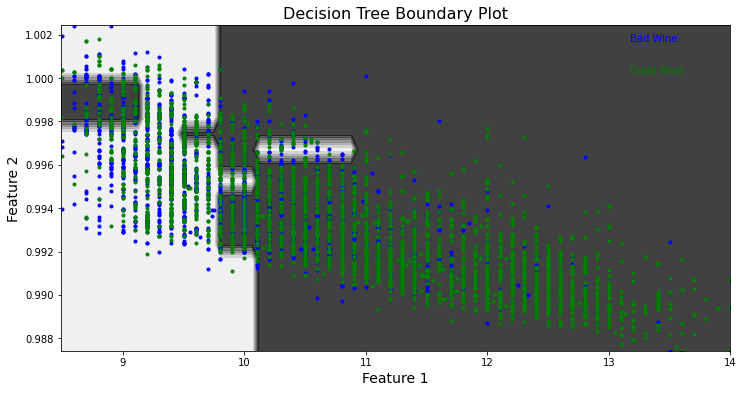


Train Accuracy:  0.7327718223583461
-----------------------------------------

Test Accuracy:  0.7234693877551021

Test Confusion Matrix:
[[171 150]
 [121 538]]

Test Precision = 0.781977
Test Recall = 0.816388
Test F1 Score = 0.798812

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       321
           1       0.78      0.82      0.80       659

    accuracy                           0.72       980
   macro avg       0.68      0.67      0.68       980
weighted avg       0.72      0.72      0.72       980



In [17]:
decision_tree_report("alcohol", "density")

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.7s finished


Optimal Hyperparameter Values:  {'max_depth': 8, 'min_samples_leaf': 30}




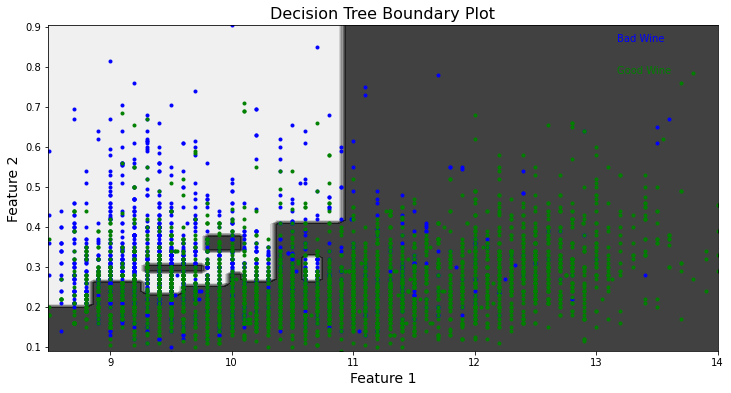


Train Accuracy:  0.7697805002552323
-----------------------------------------

Test Accuracy:  0.7377551020408163

Test Confusion Matrix:
[[163 158]
 [ 99 560]]

Test Precision = 0.779944
Test Recall = 0.849772
Test F1 Score = 0.813362

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       321
           1       0.78      0.85      0.81       659

    accuracy                           0.74       980
   macro avg       0.70      0.68      0.69       980
weighted avg       0.73      0.74      0.73       980



In [19]:
decision_tree_report("alcohol", "volatile acidity")

In [23]:
def all_feature_decision_tree_report():
    scaler = StandardScaler()
    
    eff_X = X
    eff_X_test = X_test
    eff_X_train = X_train
    
    param_grid = {'min_samples_leaf': [1, 2, 3, 4, 6, 8, 15, 30, 50, 100],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50]}
    
    dt_clf = DecisionTreeClassifier()

    dt_clf_cv = GridSearchCV(dt_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
    dt_clf_cv.fit(eff_X_train, y_train)

    params_optimal = dt_clf_cv.best_params_

    print("Optimal Hyperparameter Values: ", params_optimal)
    print("\n")
    
    clf = dt_clf_cv
        
    y_train_predicted = clf.predict(eff_X_train)
    y_test_predicted = clf.predict(eff_X_test)
    print("\nTrain Accuracy: ", np.mean(y_train_predicted == y_train))
    
    print("-----------------------------------------")
    print("\nTest Accuracy: ", np.mean(y_test_predicted == y_test))
    print("\nTest Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_predicted))


    precision_test = precision_score(y_test, y_test_predicted) 
    print("\nTest Precision = %f" % precision_test)

    recall_test = recall_score(y_test, y_test_predicted)
    print("Test Recall = %f" % recall_test)


    f1_test = f1_score(y_test, y_test_predicted)
    print("Test F1 Score = %f" % f1_test)


    print("\nClassification Report:")
    print(classification_report(y_test, y_test_predicted))

In [24]:
all_feature_decision_tree_report()

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s


Optimal Hyperparameter Values:  {'max_depth': 50, 'min_samples_leaf': 1}



Train Accuracy:  1.0
-----------------------------------------

Test Accuracy:  0.7887755102040817

Test Confusion Matrix:
[[218 103]
 [104 555]]

Test Precision = 0.843465
Test Recall = 0.842185
Test F1 Score = 0.842825

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       321
           1       0.84      0.84      0.84       659

    accuracy                           0.79       980
   macro avg       0.76      0.76      0.76       980
weighted avg       0.79      0.79      0.79       980



[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:    9.3s finished


In [25]:
print("This is still completely overfitting, but the overfitting hyperparameters seems to also be the best test hyperparameters")

This is still completely overfitting, but the overfitting hyperparameters seems to also be the best test hyperparameters
